In [1]:
from bs4 import BeautifulSoup
import requests
import json
import pdfkit
import matplotlib.pyplot as plt
from reportlab.pdfgen import canvas

In [2]:
news_url='https://www.deccanherald.com/national/coronavirus-india-update-state-wise-total-number-of-confirmed-cases-deaths-812987.html'

In [3]:
html_text= requests.get(news_url).text

In [4]:
soup=BeautifulSoup(html_text,'html5lib')

In [5]:
new_soup = soup.find_all('div', class_='field-item even')

In [6]:
main_content=new_soup[1].text

In [7]:
main_content_list=main_content.split("\n")

In [8]:
main_content_list.pop(main_content_list.index(''))

''

In [9]:
main_content_list

['The spread of novel coronavirus in India has created panic in the country. After the first confirmed positive case was reported on January 30 in Kerala, the epidemic has reached many other cities in the country, infecting several people.',
 'The novel coronavirus, which originated in China, has claimed thousands of lives across the globe. With no known cure so far for the disease, COVID-19 has become a major issue for the entire world.',
 'Follow live updates of coronavirus cases in India here',
 'While the impact of the novel coronavirus has been the most in China and Italy, India also is within its grasp. After making its presence in Kerala first, the novel coronavirus reached other cities/regions including Bengaluru, Pune, Delhi, Jaipur, Agra, Hyderabad, Jammu and Kashmir among others.',
 '',
 'Courtesy: DataLEADS',
 'While the Centre and state governments have been trying hard to check the spread of coronavirus by tracking, isolating and treating the infected persons, the gradual

In [10]:
content=main_content_list[:main_content_list.index('Courtesy: DataLEADS'):]


In [11]:
state_list=main_content_list[main_content_list.index('Courtesy: DataLEADS')+1:]

In [12]:
Total_case=state_list[0]
total_deaths=state_list[1]
total_recovered=state_list[-1]

In [13]:
death_cnt_by_states=state_list[2:state_list.index('States/UT with confirmed positive cases:')]

In [14]:
death_cnt_by_states

['Total number of positive cases in India: 307 as of\xa0March 21',
 'Total deaths in India: 4',
 'Karnataka: 1',
 'Delhi: 1',
 'Maharashtra: 1',
 'Punjab: 1']

In [15]:
Totl_pstv_case=death_cnt_by_states[0]
Totl_case_str=str(Totl_pstv_case)

Totl_case,Totl_cnt=Totl_pstv_case.split(':')
print(Totl_case_str)

Total number of positive cases in India: 307 as of March 21


In [16]:
pstve_case_by_states=state_list[state_list.index('States/UT with confirmed positive cases:')+1:-1]

In [17]:
pstve_case_by_states

['Kerala: 52\xa0(including 8\xa0foreigners)',
 'Punjab: 6',
 'Delhi: 20\xa0(including one foreigner)',
 'Jammu and Kashmir: 4',
 'Ladakh: 13',
 'Rajasthan: 23\xa0(including 2 foreigners)',
 'Uttar Pradesh: 27\xa0(including one foreigner)',
 'Maharashtra: 64\xa0(including 3 foreigners)',
 'Karnataka: 19',
 'Tamil Nadu: 6 (including 3 foreigners)',
 'Telangana: 17\xa0(including 2 foreigners)',
 'Haryana: 17\xa0(including 14 foreigners)',
 'Andhra Pradesh: 3',
 'Himachal Pradesh: 2',
 'Gujarat: 13',
 'Uttarakhand: 3',
 'Odisha: 2',
 'West Bengal: 3',
 'Chandigarh: 8',
 'Chhattisgarh: 1',
 'Madhya Pradesh: 4',
 'No. of people discharged:\xa023',
 '']

In [18]:
str_pstve_case=str(pstve_case_by_states)

In [19]:
str_pstve_list=str_pstve_case.replace('\\xa0',' ')
str_pstve_list=str_pstve_list.replace('[','')
str_pstve_list=str_pstve_list.replace(']','')
str_pstve_list=str_pstve_list.replace("'",'')
str_pstve_list.strip()

'Kerala: 52 (including 8 foreigners), Punjab: 6, Delhi: 20 (including one foreigner), Jammu and Kashmir: 4, Ladakh: 13, Rajasthan: 23 (including 2 foreigners), Uttar Pradesh: 27 (including one foreigner), Maharashtra: 64 (including 3 foreigners), Karnataka: 19, Tamil Nadu: 6 (including 3 foreigners), Telangana: 17 (including 2 foreigners), Haryana: 17 (including 14 foreigners), Andhra Pradesh: 3, Himachal Pradesh: 2, Gujarat: 13, Uttarakhand: 3, Odisha: 2, West Bengal: 3, Chandigarh: 8, Chhattisgarh: 1, Madhya Pradesh: 4, No. of people discharged: 23,'

In [20]:
pstv_list= str_pstve_list.split(',')

In [21]:
pstv_list

['Kerala: 52 (including 8 foreigners)',
 ' Punjab: 6',
 ' Delhi: 20 (including one foreigner)',
 ' Jammu and Kashmir: 4',
 ' Ladakh: 13',
 ' Rajasthan: 23 (including 2 foreigners)',
 ' Uttar Pradesh: 27 (including one foreigner)',
 ' Maharashtra: 64 (including 3 foreigners)',
 ' Karnataka: 19',
 ' Tamil Nadu: 6 (including 3 foreigners)',
 ' Telangana: 17 (including 2 foreigners)',
 ' Haryana: 17 (including 14 foreigners)',
 ' Andhra Pradesh: 3',
 ' Himachal Pradesh: 2',
 ' Gujarat: 13',
 ' Uttarakhand: 3',
 ' Odisha: 2',
 ' West Bengal: 3',
 ' Chandigarh: 8',
 ' Chhattisgarh: 1',
 ' Madhya Pradesh: 4',
 ' No. of people discharged: 23',
 ' ']

In [22]:
pstv_list

['Kerala: 52 (including 8 foreigners)',
 ' Punjab: 6',
 ' Delhi: 20 (including one foreigner)',
 ' Jammu and Kashmir: 4',
 ' Ladakh: 13',
 ' Rajasthan: 23 (including 2 foreigners)',
 ' Uttar Pradesh: 27 (including one foreigner)',
 ' Maharashtra: 64 (including 3 foreigners)',
 ' Karnataka: 19',
 ' Tamil Nadu: 6 (including 3 foreigners)',
 ' Telangana: 17 (including 2 foreigners)',
 ' Haryana: 17 (including 14 foreigners)',
 ' Andhra Pradesh: 3',
 ' Himachal Pradesh: 2',
 ' Gujarat: 13',
 ' Uttarakhand: 3',
 ' Odisha: 2',
 ' West Bengal: 3',
 ' Chandigarh: 8',
 ' Chhattisgarh: 1',
 ' Madhya Pradesh: 4',
 ' No. of people discharged: 23',
 ' ']

In [23]:
states=[]
count=[]
try:
    pstv_list.pop(pstv_list.index(' '))
    pstv_list.pop(pstv_list.index('  '))
except:
    pass

for row in pstv_list:
    st,cnt= row.split(":")
    states.append(st)
    count.append(cnt)

In [24]:
case_cnt=[]
for row in count:
    stripped=row.strip(' ')[0:2]
    case_cnt.append(stripped.zfill(2))

In [25]:
import pandas as pd

In [26]:
df_states=pd.DataFrame(states[0:-1],columns=['States'])

In [27]:
df_states

,States
0,Kerala
1,Punjab
2,Delhi
3,Jammu and Kashmir
4,Ladakh
5,Rajasthan
6,Uttar Pradesh
7,Maharashtra
8,Karnataka
9,Tamil Nadu


In [28]:
df_counts=pd.DataFrame(pd.to_numeric(case_cnt[0:-1]),columns=['Counts'])

In [29]:
df_counts

,Counts
0,52
1,6
2,20
3,4
4,13
5,23
6,27
7,64
8,19
9,6


In [30]:
frames=[df_states,df_counts]
df= pd.concat(frames,axis=1)

In [31]:
df

,States,Counts
0,Kerala,52
1,Punjab,6
2,Delhi,20
3,Jammu and Kashmir,4
4,Ladakh,13
5,Rajasthan,23
6,Uttar Pradesh,27
7,Maharashtra,64
8,Karnataka,19
9,Tamil Nadu,6


In [32]:
sorted_df=df.sort_values('Counts')

df_sorted=sorted_df.tail(3)


In [33]:
df_sorted

,States,Counts
6,Uttar Pradesh,27
0,Kerala,52
7,Maharashtra,64


In [34]:
from datetime import date
from datetime import datetime

Survey_date=date.today()
print(Survey_date)

time_now=datetime.now()
time_format=str(time_now)[:-7]



2020-03-21


In [35]:
Header_content=str(content)

In [36]:
for c in '[""]':
    Header_content=Header_content.replace(c,'')

    
final_content=Totl_case_str+'.\n'+Header_content
final_cnt= final_content.replace("'",'')

print(final_cnt)

Total number of positive cases in India: 307 as of March 21.
The spread of novel coronavirus in India has created panic in the country. After the first confirmed positive case was reported on January 30 in Kerala, the epidemic has reached many other cities in the country, infecting several people., The novel coronavirus, which originated in China, has claimed thousands of lives across the globe. With no known cure so far for the disease, COVID-19 has become a major issue for the entire world., Follow live updates of coronavirus cases in India here, While the impact of the novel coronavirus has been the most in China and Italy, India also is within its grasp. After making its presence in Kerala first, the novel coronavirus reached other cities/regions including Bengaluru, Pune, Delhi, Jaipur, Agra, Hyderabad, Jammu and Kashmir among others., 


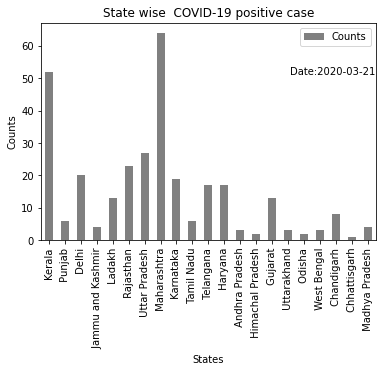

In [37]:
df.plot(kind='bar',x='States',y='Counts',color='grey')

plt.ylabel('Counts')
plt.title("State wise  COVID-19 positive case")

plt.figtext(.8,.7,"Date:"+str(Survey_date),ha="center",color='black',size='medium')

plt.savefig('Bar Chart '+str(Survey_date)+' .png',bbox_inches='tight')
plt.show()



In [38]:
from reportlab.lib.pagesizes import letter, landscape
from reportlab.platypus import Paragraph, Frame, KeepInFrame
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.units import inch

c =canvas.Canvas("COVID-19 "+str(Survey_date)+".pdf", pagesize=landscape(letter))
frame1 = Frame(1*inch, 1*inch, 5*inch, 5*inch)
c.drawImage('Bar Chart '+str(Survey_date)+' .png',400,300, width=300,height=300)

styles = getSampleStyleSheet()
story = [Paragraph(final_cnt, styles['Normal'])]
story_inframe = KeepInFrame(4*inch, 4*inch, story)
frame1.addFromList([story_inframe], c)
c.save()
